<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Агрегированные-данные-о-вводе-товаров-в-оборот:" data-toc-modified-id="Агрегированные-данные-о-вводе-товаров-в-оборот:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Агрегированные данные о вводе товаров в оборот:</a></span></li><li><span><a href="#Агрегированные-данные-о-выводе-товаров-из-оборота:" data-toc-modified-id="Агрегированные-данные-о-выводе-товаров-из-оборота:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Агрегированные данные о выводе товаров из оборота:</a></span></li><li><span><a href="#Агрегированные-данные-о-перемещениях-товаров-между-участниками" data-toc-modified-id="Агрегированные-данные-о-перемещениях-товаров-между-участниками-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Агрегированные данные о перемещениях товаров между участниками</a></span></li><li><span><a href="#Справочник-продукции" data-toc-modified-id="Справочник-продукции-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Справочник продукции</a></span></li><li><span><a href="#Справочник-торговых-точек" data-toc-modified-id="Справочник-торговых-точек-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Справочник торговых точек</a></span></li><li><span><a href="#Справочник-участников-оборота-товаров" data-toc-modified-id="Справочник-участников-оборота-товаров-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Справочник участников оборота товаров</a></span></li><li><span><a href="#Данные-о-выводе-товаров-из-оборота-для-одного-розничного-продавца" data-toc-modified-id="Данные-о-выводе-товаров-из-оборота-для-одного-розничного-продавца-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Данные о выводе товаров из оборота для одного розничного продавца</a></span></li><li><span><a href="#Соединяем-таблицы-data_dict_torg_tochka_one_seller-и-data_one_seller-по-id_sp_" data-toc-modified-id="Соединяем-таблицы-data_dict_torg_tochka_one_seller-и-data_one_seller-по-id_sp_-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Соединяем таблицы <code>data_dict_torg_tochka_one_seller</code> и <code>data_one_seller</code> по <code>id_sp_</code></a></span></li></ul></li><li><span><a href="#Рассчет-аналитик" data-toc-modified-id="Рассчет-аналитик-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Рассчет аналитик</a></span><ul class="toc-item"><li><span><a href="#Динамика-продаж-в-торговой-точке" data-toc-modified-id="Динамика-продаж-в-торговой-точке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Динамика продаж в торговой точке</a></span></li><li><span><a href="#Динамика-продаж-по-всем-торговым-точкам" data-toc-modified-id="Динамика-продаж-по-всем-торговым-точкам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Динамика продаж по всем торговым точкам</a></span></li><li><span><a href="#Динамика-колебания-цены-товара" data-toc-modified-id="Динамика-колебания-цены-товара-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Динамика колебания цены товара</a></span></li><li><span><a href="#Количество-магазинов,-в-которых-продается-товар" data-toc-modified-id="Количество-магазинов,-в-которых-продается-товар-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Количество магазинов, в которых продается товар</a></span></li><li><span><a href="#Динамика-количества-уникальных-магазинов,-в-которых-продается-товар" data-toc-modified-id="Динамика-количества-уникальных-магазинов,-в-которых-продается-товар-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Динамика количества уникальных магазинов, в которых продается товар</a></span></li></ul></li></ul></div>

## Анализ данных

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 45)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Загрузка таблиц с агрегированными данными и справочников

In [2]:
data_vvod = pd.read_csv('Агрегированные данные о вводе товаров в оборот с 2021-11-22 по 2022-11-21.csv')
data_vyvod = pd.read_csv('Агрегированные данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21.csv')
data_dvizhenie = pd.read_csv('Агрегированные данные о перемещениях товаров между участниками с 2021-11-22 по 2022-11-21.csv')

data_dict_prod = pd.read_csv('Справочник продукции.csv')
data_dict_torg_tochka = pd.read_csv('Справочник торговых точек.csv')
data_dict_uchastniki = pd.read_csv ('Справочник участников оборота товаров.csv')

Загрузка таблицы с данными одного розничного продавца

In [3]:
data_one_seller = pd.read_csv('Данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21 один розничный продавец.csv')

In [4]:
def data_info(data):
    return display(data.head(10)), display(data.info()), display(data.describe()),display(data.duplicated().sum()),display(data.isna().mean().apply('{:.2%}'.format))

### Агрегированные данные о вводе товаров в оборот:

* `dt` Дата ввода в оборот
* `region_code` Код региона ввода в оборот
* `operation_type` Тип ввода в оборот
* `org_count` Количество уникальных участников оборота, которые вводили товары в оборот
* `assortment` Количество уникальных GTIN товаров, введенных в оборот
* `count_brand` Количество уникальных брендов товаров, введенных в оборот
* `cnt` Количество введенных в оборот товаров

In [5]:
#Агрегированные данные о вводе товаров в оборот
data_vvod.head()

,dt,region_code,operation_type,org_count,assortment,count_brand,cnt
0,2022-02-24,3,Маркировка остатков,1,1,1,1
1,2022-02-04,63,Маркировка остатков,1,1,1,2
2,2021-11-23,66,Маркировка остатков,7,98,10,547
3,2022-11-12,64,РФ,1,2,1,2
4,2022-09-26,54,Перемаркировка,1,1,1,8


In [6]:
data_vvod['operation_type'].unique()

array(['Маркировка остатков', 'РФ', 'Перемаркировка',
       'Принято от физического лица', 'Возврат', 'Импорт. Не ЕАЭС',
       'Импорт. ЕАЭС'], dtype=object)

In [7]:
# Сводная таблица: сумма количества введенных в оборот товаров по регионам по типам операций
data_vvod_pivot = data_vvod.pivot_table(
    index=['region_code','operation_type'],
    values = ['cnt'],
    aggfunc ='sum'
).reset_index()

In [8]:
data_vvod_pivot.head()

,region_code,operation_type,cnt
0,1,Возврат,21
1,1,Импорт. ЕАЭС,36957
2,1,Перемаркировка,2
3,2,Возврат,2148
4,2,Маркировка остатков,1917


### Агрегированные данные о выводе товаров из оборота:

* `dt` Дата ввода в оборот
* `region_code` Код региона вывода товара из оборота
* `type_operation` Тип вывода товара из оборота
* `count_active_point` Количество уникальных торговых точек, в которых осуществлялся вывод товара из оборота
* `org_count` Количество уникальных участников оборота, которыми осуществлялся вывод товара из оборота
* `assortment` Количество уникальных GTIN выведенных из оборота товаров 
* `count_brand` Количество уникальных брендов выведенных из оборота товаров
* `cnt` Количество выведенного из оборота товара
* `sum_price` Суммарная стоимость вывода из оборота

In [9]:
#Агрегированные данные о выводе товаров из оборота
data_vyvod.head()

,dt,region_code,type_operation,count_active_point,org_count,assortment,count_brand,cnt,sum_price
0,2022-07-01,58,Прочий тип вывода из оборота,4,4,4,3,4,51827
1,2022-03-04,75,Прочий тип вывода из оборота,20,13,75,21,104,1350999
2,2021-12-19,54,Продажа конечному потребителю в точке продаж,210,89,539,125,1430,20375011
3,2022-08-23,72,Продажа конечному потребителю в точке продаж,90,57,287,60,414,3780981
4,2022-04-20,51,Продажа конечному потребителю в точке продаж,48,22,234,49,702,4249332


Сводная таблица по средней суммы вывода из оборота по региону, по типу операции


In [10]:
# Сводная таблица по средней суммы вывода из оборота по региону, по типу операции
data_vyvod_pivot = data_vyvod.pivot_table(
    index=['region_code','type_operation'],
    values = ['sum_price'],
    aggfunc ='mean'
).reset_index()

In [11]:
data_vyvod_pivot.head()

,region_code,type_operation,sum_price
0,1,Конечная продажа организации,0.000000
1,1,Продажа конечному потребителю в точке продаж,934344.994521
2,1,Прочий тип вывода из оборота,49315.740000
3,1,Списание / Вывод из оборота без получателя,0.000000
4,2,Дистанционная продажа конечному потребителю,0.000000


### Агрегированные данные о перемещениях товаров между участниками
* `dt` Дата ввода в оборот
* `sender_region_code` Код региона передачи товара
* `receiver_region_code` Код региона приема товара
* `sender_org_count` Количество уникальных участников, передавших товар
* `receiver_org_count` Количество уникальных участников, принявших товар
* `assortment` Количество уникальных переданных GTIN товаров
* `count_brand` Количество уникальных переданных брендов товаров
* `cnt_moved` Количество переданных товаров

In [12]:
# Агрегированные данные о перемещениях товаров между участниками
data_dvizhenie.head()

,t1.dt,sender_region_code,receiver_region_code,sender_org_count,receiver_org_count,assortment,count_brand,cnt_moved
0,2022-10-16,43,77,1,1,1,1,16
1,2022-05-31,50,56,5,3,98,15,928
2,2022-04-05,77,59,1,1,1,1,3
3,2022-07-14,58,66,1,1,2,2,2
4,2022-10-30,64,71,1,1,1,1,1


### Справочник продукции

* `gtin` Глобальный номер товарной продукции
* `inn` ИНН владельца карточки товара
* `product_name` Наименования товара
* `product_short_name` Вид товара
* `tnved` Код ТНВЭД
* `tnved10` Код ТНВЭД10
* `brand` Бренд
* `country` Страна происхождения
* `volume` Заявленный вес единицы товара

In [13]:
# Справочник продукции
data_dict_prod.head()

,gtin,inn,product_name,product_short_name,tnved,tnved10,brand,country,volume
0,8C414C7757D587886C10DB0CCEA641A2,D0B1FE981FCC19F934C3FFD91690430F,68F60FA530914522B26E25F262EBC6D6,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,58A4B52373651DA4292AD5725D388F8A,D2D1641B196DA5477D40C0907FD5F1DA,NaN,10
1,3D8C701836C4C0A5B33D57522A7EDBAB,9B0AFDA27FCCB188768FA9B611183387,670017E2D871B8962E5456CA71F6A1D1,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,58A4B52373651DA4292AD5725D388F8A,670017E2D871B8962E5456CA71F6A1D1,NaN,НЕ КЛАССИФИЦИРОВАНО
2,B1308C75C38993B0EEA22C8FE2899C2A,86CAE1EAD8AF200ED46453FD18FA1A04,97181A85E3400C38AB223F17A5DCCFCC,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,ABB51261177B26E23AC2DE0F0508D6AB,NaN,100
3,1D71E57CA201A8ACEADBAA8D6E7039DE,86CAE1EAD8AF200ED46453FD18FA1A04,EA5CEDF8FA0F5BEBD2F047151B2DBE86,B8AF2335E04E7BAD5168D9B39FABAC21,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,EDFFD44E0EC18764685E952553560EEF,NaN,100
4,5DEF4AA62907D322F85FA88839F00E8F,86CAE1EAD8AF200ED46453FD18FA1A04,75AF532015CFA92F71FF54ADEDB9BEA3,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,75AF532015CFA92F71FF54ADEDB9BEA3,NaN,50


### Справочник торговых точек
Торговая точка – это
уникальная
комбинация адреса,
указанного в
документе вывода из
оборота, и ИНН

* `id_sp` Внутренний идентификатор точки продажи
* `inn` ИНН участника оборота,которому принадлежит точка продажи

Атрибуты,
полученные из адреса,
указанного в
документе вывода из
оборота (например, в
чеке)

* `region_code` Код региона расположения точки продажи
* `city_with_type` Наименование города расположения точки продажи
* `city_fias_id` ФИАС код города расположения точки продажи
* `postal_code` Почтовый код точки продажи

In [14]:
# Справочник торговых точек
data_dict_torg_tochka.head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
0,C72AC534DBF5E6369840FFE9DA9FF403,0056F9FCFA009E493BEFEAE4FAA71D82,51,NaN,NaN,184421.0
1,591942644AE25AE4DD26CF943BB97414,81AAC456284F455FC2B141E6E8F1A76C,66,г Екатеринбург,2763c110-cb8b-416a-9dac-ad28a55b4402,620027.0
2,A6E2261F16F84FF09E2B615EDB008943,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390026.0
3,DC3B647A089FA064DE61E0C778F5EE45,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390017.0
4,D2F125BAA947B6293CD055DA1DEEA87D,87C2FDB73C26C96266A0947C2BB714BF,62,г Рыбное,91d71d8c-2f1a-43c8-bc84-d78dc4245a1b,391112.0


### Справочник участников оборота товаров

* `inn` ИНН
* `region_code` Код региона регистрации

In [15]:
# Справочник участников оборота товаров
data_dict_uchastniki.head()

,inn,region_code
0,60DFB6F87ABF6232A5D97A1A827F8D88,1
1,2D13C279C7CEC509D21695F0268ECCEA,1
2,1705C73792D7A1A5ABDF1883FE851004,1
3,B4CC35BD7D8F69E665160F548EBE125D,23
4,2DB318BEA4A44280FA488A0B2AF36254,1


In [16]:
# Сводная таблица: количество участников оборота товаров в каждом регионе
data_dict_uchastniki_pivot = data_dict_uchastniki.pivot_table(
    index=['region_code'],
    values = ['inn'],
    aggfunc ='count'
).reset_index()

In [17]:
data_for_bar = data_dict_uchastniki_pivot.sort_values(by='inn', ascending = False).reset_index(drop=True)

In [18]:
data_for_bar.head()

,region_code,inn
0,77,1520
1,66,1163
2,50,926
3,22,836
4,38,745


In [19]:
data_for_bar['region_code'] = data_for_bar['region_code'].astype(str)

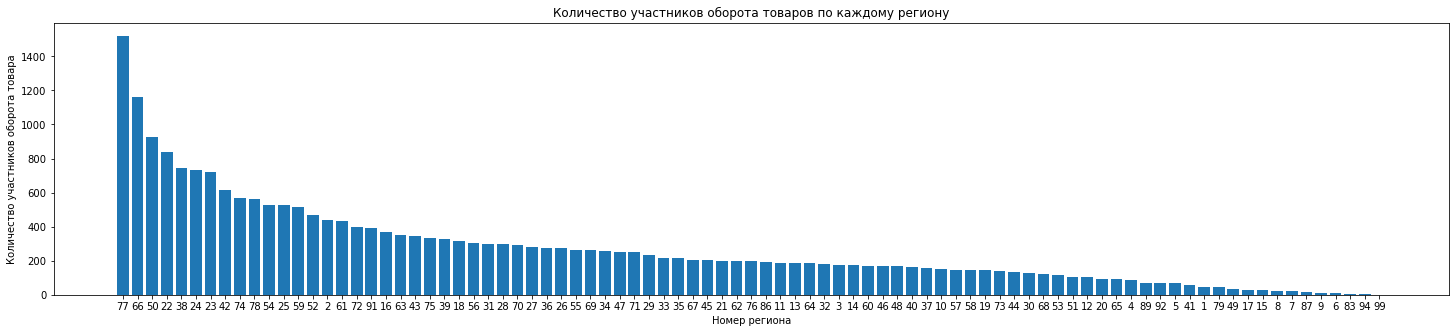

In [20]:
fig = plt.figure(figsize = (25, 5))
plt.bar( data_for_bar['region_code'], data_for_bar['inn'] )
plt.xlabel("Номер региона")
plt.ylabel("Количество участников оборота товара")
plt.title("Количество участников оборота товаров по каждому региону")
plt.show()

### Данные о выводе товаров из оборота для одного розничного продавца

* `dt` Дата ввода в оборот
* `gtin` GTIN товара, введенного в оборот
* `prid` ИНН владельца карточки товара
* `inn` ИНН участника, выводившего товар из оборота
* `id_sp` Внутренний идентификатор точки продажи, в которой был осуществлен вывод из оборота

Идентификатор точки
продажи заполняется
только в случае
наличия в документе
вывода из оборота
информации об
адресе
type_operation Тип вывода товара из оборота 1. Продажа

* `type_operation` Тип вывода товара из оборота 
1. Продажа
конечному
потребителю в
точке продаж
2. Дистанционная
продажа
конечному
потребителю
3. Конечная продажа
организации
4. Продажа по
государственному
контракту
5. Прочий тип
вывода из оборота
6. Списание / Вывод
из оборота без
получателя
7. Продажи за
пределы РФ

* `price` Цена вывода из оборота

В случае продажи –
это цена за единицу
товара, которая была
уплачена при покупке

* `cnt` Количество выведенного из оборота товара




In [21]:
data_info(data_one_seller)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,135100,1
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,80000,1
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,99642,3
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,54857,1
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,12885,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262895 entries, 0 to 2262894
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   dt              object
 1   gtin            object
 2   prid            object
 3   inn             object
 4   id_sp_          object
 5   type_operation  object
 6   price           int64 
 7   cnt             int64 
dtypes: int64(2), object(6)
memory usage: 138.1+ MB


None

,price,cnt
count,2.262895e+06,2.262895e+06
mean,7.284491e+04,1.596791e+00
std,6.165614e+04,3.813801e+00
min,0.000000e+00,1.000000e+00
25%,2.855700e+04,1.000000e+00
50%,6.342800e+04,1.000000e+00
75%,9.680000e+04,1.000000e+00
max,1.764285e+06,9.700000e+02


9

dt                 0.00%
gtin               0.00%
prid               0.00%
inn                0.00%
id_sp_            30.11%
type_operation     0.00%
price              0.00%
cnt                0.00%
dtype: object

(None, None, None, None, None)

Приводим столбец с датой к формату datetime и создаем три столбца с месяцем и днём и годом, а также столбец total_sum = price*cnt  

In [22]:
data_one_seller['dt']=pd.to_datetime(data_one_seller['dt'], format='%Y-%m-%d')

In [23]:
data_one_seller['month']=data_one_seller['dt'].dt.month
data_one_seller['day']=data_one_seller['dt'].dt.day
data_one_seller['year']=data_one_seller['dt'].dt.year

In [24]:
data_one_seller['total_price'] = data_one_seller['price']*data_one_seller['cnt']

In [25]:
data_one_seller['inn'].unique()

array(['6B8E111AB5B5C556C0AEA292ACA4D88B'], dtype=object)

Нам предоставили данные для одного розничного продавца с `inn` `6B8E111AB5B5C556C0AEA292ACA4D88B`. Смотрим справочник по торговым точкам для него 

In [26]:
data_dict_torg_tochka_one_seller = data_dict_torg_tochka.query('inn == "6B8E111AB5B5C556C0AEA292ACA4D88B"')

In [27]:
data_info(data_dict_torg_tochka_one_seller)

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
38,A44F290366CE1023507C993710313E3E,6B8E111AB5B5C556C0AEA292ACA4D88B,64,г Саратов,bf465fda-7834-47d5-986b-ccdb584a85a6,410005.0
48,0B66F6FBECAFFB62AA6C70DC9A5E2994,6B8E111AB5B5C556C0AEA292ACA4D88B,77,NaN,NaN,111622.0
57,D4079C72BE0EE138A787385DD327DF2E,6B8E111AB5B5C556C0AEA292ACA4D88B,64,г Саратов,bf465fda-7834-47d5-986b-ccdb584a85a6,410012.0
374,95E5F1CB2478D04148F32E04509712B8,6B8E111AB5B5C556C0AEA292ACA4D88B,47,г Кудрово,98cd19c4-e172-4fa3-a81d-7caedeec669b,188692.0
729,44EF61711FD55ACC27AC2A767C655355,6B8E111AB5B5C556C0AEA292ACA4D88B,55,г Омск,140e31da-27bf-4519-9ea0-6185d681d44e,644024.0
1506,9233D93E2D6B6B06330D9A3AA80773EE,6B8E111AB5B5C556C0AEA292ACA4D88B,77,NaN,NaN,127282.0
1649,F50B2FA5625D7705F8616BE82D972E27,6B8E111AB5B5C556C0AEA292ACA4D88B,77,NaN,NaN,115201.0
1650,BB65115152DD8B0911D01E5DCDC2B23C,6B8E111AB5B5C556C0AEA292ACA4D88B,50,г Химки,d76255c8-3173-4db5-a39b-badd3ebdf851,141402.0
1741,CCC5EF5AC969E1DA14F06D0DA2D2136B,6B8E111AB5B5C556C0AEA292ACA4D88B,53,г Великий Новгород,8d0a05bf-3b8a-43e9-ac26-7ce61d7c4560,173021.0
1760,ADA10ED76FA6DC6211F9E9EA4586C22C,6B8E111AB5B5C556C0AEA292ACA4D88B,57,г Ливны,aef2c735-2e21-42e5-8638-9667bade6a2b,303850.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 38 to 57687
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_sp_          299 non-null    object 
 1   inn             299 non-null    object 
 2   region_code     299 non-null    int64  
 3   city_with_type  189 non-null    object 
 4   city_fias_id    189 non-null    object 
 5   postal_code     299 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 16.4+ KB


None

,region_code,postal_code
count,299.00000,299.000000
mean,54.48495,310482.899666
std,23.14375,187763.064048
min,2.00000,103265.000000
25%,35.00000,160000.000000
50%,58.00000,198095.000000
75%,77.00000,425926.500000
max,86.00000,693014.000000


0

id_sp_             0.00%
inn                0.00%
region_code        0.00%
city_with_type    36.79%
city_fias_id      36.79%
postal_code        0.00%
dtype: object

(None, None, None, None, None)

Пропущенные значения в `city_with_type` и `city_fias_id` заменяем на `Unknown`

In [28]:
data_dict_torg_tochka_one_seller = data_dict_torg_tochka_one_seller.fillna('Unknown')

In [29]:
data_dict_torg_tochka_one_seller['city_with_type']=data_dict_torg_tochka_one_seller['city_with_type'].astype(str)

In [30]:
data_dict_torg_tochka_one_seller.head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
38,A44F290366CE1023507C993710313E3E,6B8E111AB5B5C556C0AEA292ACA4D88B,64,г Саратов,bf465fda-7834-47d5-986b-ccdb584a85a6,410005.0
48,0B66F6FBECAFFB62AA6C70DC9A5E2994,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,111622.0
57,D4079C72BE0EE138A787385DD327DF2E,6B8E111AB5B5C556C0AEA292ACA4D88B,64,г Саратов,bf465fda-7834-47d5-986b-ccdb584a85a6,410012.0
374,95E5F1CB2478D04148F32E04509712B8,6B8E111AB5B5C556C0AEA292ACA4D88B,47,г Кудрово,98cd19c4-e172-4fa3-a81d-7caedeec669b,188692.0
729,44EF61711FD55ACC27AC2A767C655355,6B8E111AB5B5C556C0AEA292ACA4D88B,55,г Омск,140e31da-27bf-4519-9ea0-6185d681d44e,644024.0


In [31]:
# Сводная таблица по одному продавцу: количество точек продаж по региону  по городу
data_dict_torg_tochka_one_seller_pivot = data_dict_torg_tochka_one_seller.pivot_table(
    index=['region_code', 'city_with_type'],
    values = ['inn'],
    aggfunc = 'count'
)

In [32]:
data_dict_torg_tochka_one_seller_pivot.columns = ['number_of_sp']

In [33]:
data_dict_torg_tochka_one_seller_pivot.sort_values(by='number_of_sp', ascending =False).head()

,,number_of_sp
region_code,city_with_type,
77,Unknown,55
78,Unknown,47
63,г Самара,7
55,г Омск,7
23,г Сочи,7


In [34]:
data_dict_torg_tochka_one_seller.query('region_code==77').head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
48,0B66F6FBECAFFB62AA6C70DC9A5E2994,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,111622.0
1506,9233D93E2D6B6B06330D9A3AA80773EE,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,127282.0
1649,F50B2FA5625D7705F8616BE82D972E27,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,115201.0
1919,C402C54537E34F09DCC80172AEC1799C,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,108824.0
2196,5596C7070FD5D3FFB1F0F83F1D785239,6B8E111AB5B5C556C0AEA292ACA4D88B,77,Unknown,Unknown,111250.0


In [35]:
data_dict_torg_tochka_one_seller.query('region_code==78').head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
21052,88B331A7780E5CCA88EC52ED21749105,6B8E111AB5B5C556C0AEA292ACA4D88B,78,г Колпино,1e11a121-81c4-4b66-b11c-da8f47db2e1d,196653.0
21053,A9F916B567DEF0200B232E5838D1FF38,6B8E111AB5B5C556C0AEA292ACA4D88B,78,Unknown,Unknown,195027.0
21054,4DDD0908E1DB59D5C03C5A70F7C8D365,6B8E111AB5B5C556C0AEA292ACA4D88B,78,Unknown,Unknown,197348.0
21055,899A6C6374EF291490F7D840FCBEA0C4,6B8E111AB5B5C556C0AEA292ACA4D88B,78,Unknown,Unknown,190013.0
21056,681E5DA4265F55D66AECC02275212863,6B8E111AB5B5C556C0AEA292ACA4D88B,78,Unknown,Unknown,191186.0


Гуглим зип-коды и выясняем, что регион 77 это Москва, регион 78 Санкт-Петербург. Прописываем эти значения в таблицу.

In [36]:
data_dict_torg_tochka_one_seller.loc[(data_dict_torg_tochka_one_seller['region_code'] ==77) & (
    data_dict_torg_tochka_one_seller['city_with_type'] == 'Unknown'), 'city_with_type'] = 'Москва'

In [37]:
data_dict_torg_tochka_one_seller.loc[(data_dict_torg_tochka_one_seller['region_code'] ==78) & (
    data_dict_torg_tochka_one_seller['city_with_type'] == 'Unknown'), 'city_with_type'] = 'Санкт-Петербург'

In [38]:
data_dict_torg_tochka_one_seller_pivot = data_dict_torg_tochka_one_seller.pivot_table(
    index=['region_code', 'city_with_type'],
    values = ['inn'],
    aggfunc = 'count'
).reset_index()

In [39]:
data_dict_torg_tochka_one_seller_pivot.columns = ['region_code', 'city_with_type', 'number_of_sp']

In [40]:
data_dict_torg_tochka_one_seller_pivot = data_dict_torg_tochka_one_seller_pivot.sort_values(by='number_of_sp', ascending =True)

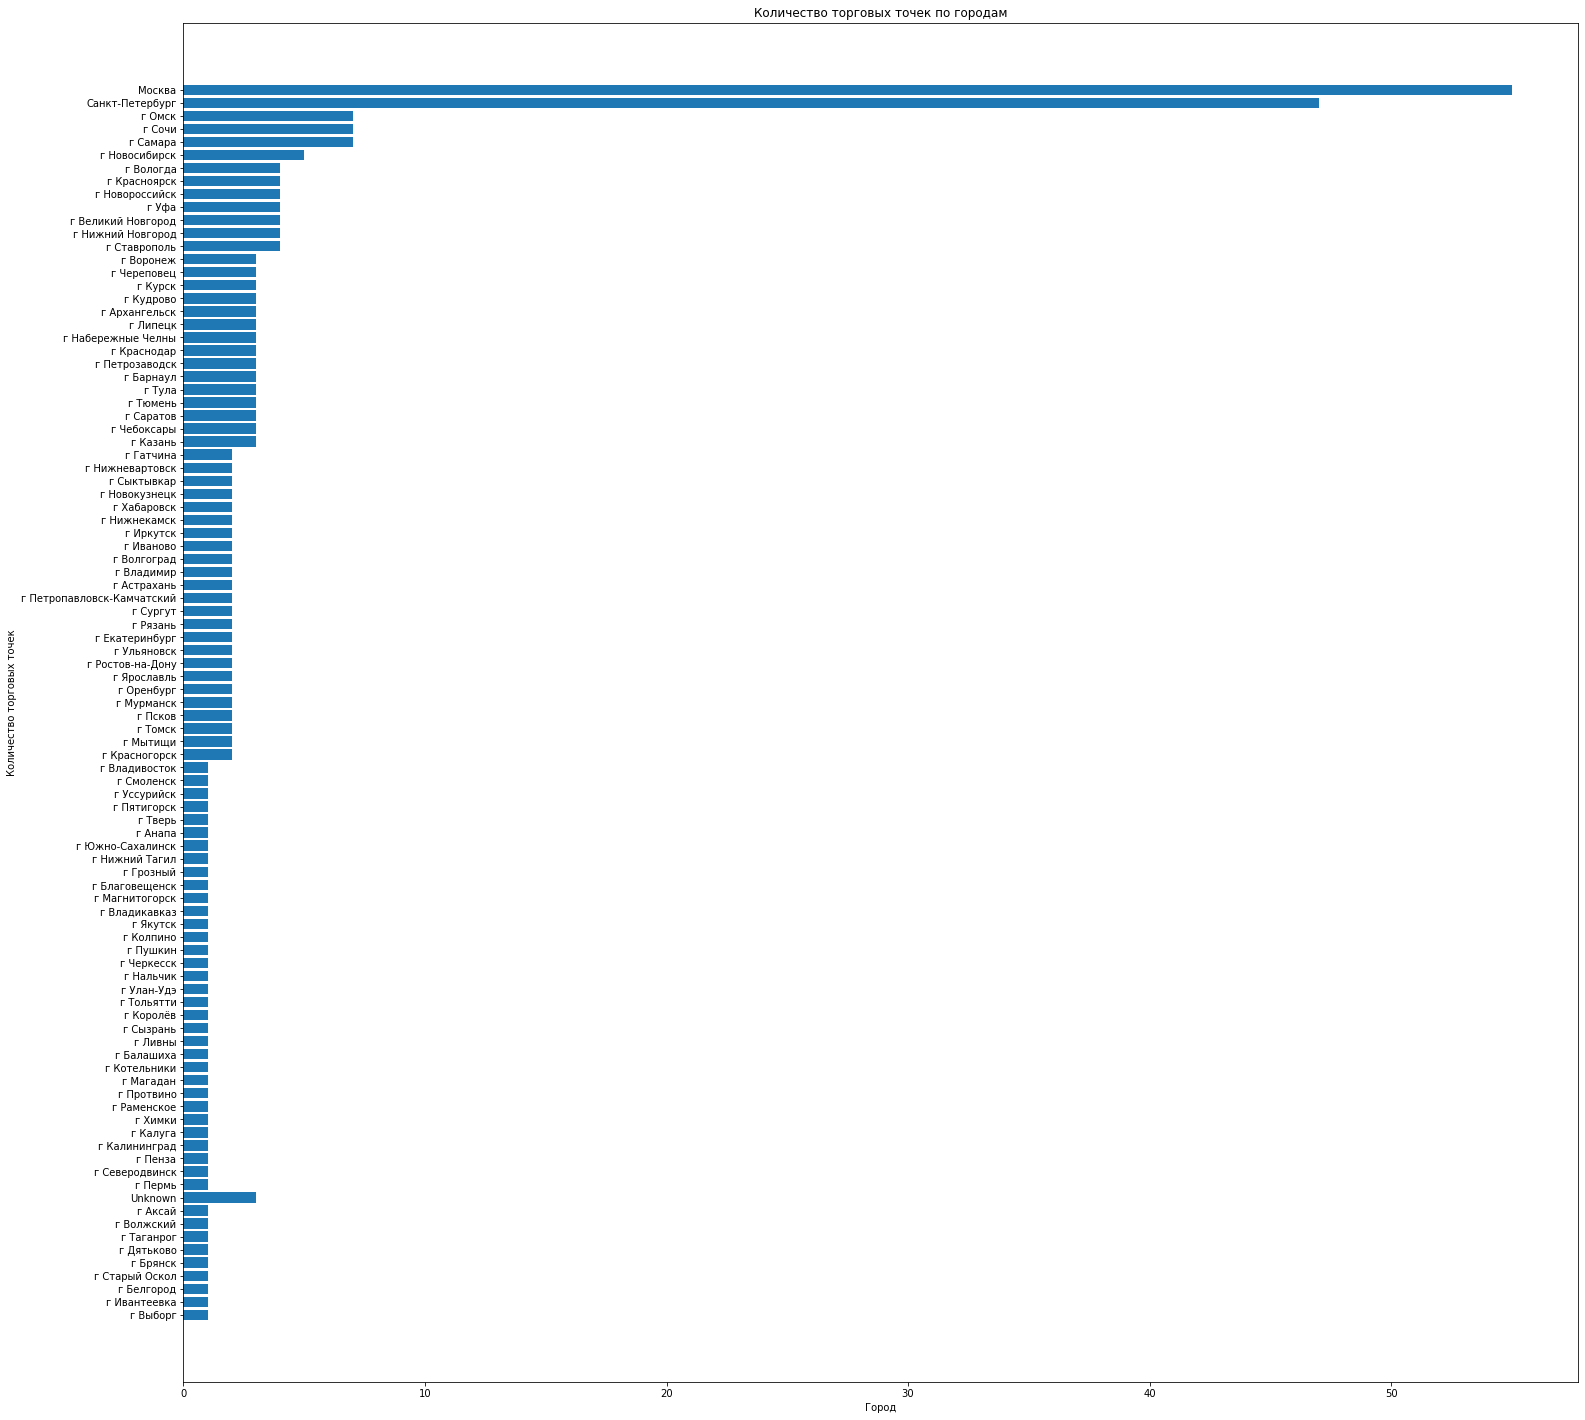

In [41]:
fig = plt.figure(figsize = (25, 25))
plt.barh( data_dict_torg_tochka_one_seller_pivot['city_with_type'], data_dict_torg_tochka_one_seller_pivot['number_of_sp'] )
plt.xlabel("Город")
plt.ylabel("Количество торговых точек")
plt.title("Количество торговых точек по городам")
plt.show()

In [42]:
# Unknown city
data_dict_torg_tochka_one_seller.query('city_with_type=="Unknown"')

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
21019,3D5C280F84F6F98BC7A5A09297E478F3,6B8E111AB5B5C556C0AEA292ACA4D88B,50,Unknown,Unknown,143582.0
21513,9F366EBE7BC5284A5762FF5B2D7378F8,6B8E111AB5B5C556C0AEA292ACA4D88B,47,Unknown,Unknown,188673.0
21516,1D7A8D8BD0A98CD30D16C23D2DF2E7B9,6B8E111AB5B5C556C0AEA292ACA4D88B,50,Unknown,Unknown,143025.0
21541,E1B2C3D9B8E3CAD1C16A25D1950BEA09,6B8E111AB5B5C556C0AEA292ACA4D88B,76,Unknown,Unknown,150521.0
22381,22EE6ED934D260FD00CE9212A50D7C43,6B8E111AB5B5C556C0AEA292ACA4D88B,39,Unknown,Unknown,238324.0
53470,A69F89ED9206D4BFA0F5B5F299096C97,6B8E111AB5B5C556C0AEA292ACA4D88B,23,Unknown,Unknown,352040.0
54962,234ED42FE6BCC49AA1FD2DB560EDDE0D,6B8E111AB5B5C556C0AEA292ACA4D88B,50,Unknown,Unknown,142440.0
56053,49AE265461AE30809A39151A4F16DDB6,6B8E111AB5B5C556C0AEA292ACA4D88B,36,Unknown,Unknown,396005.0


### Соединяем таблицы `data_dict_torg_tochka_one_seller` и `data_one_seller` по `id_sp_`

In [43]:
data_merged = pd.merge(data_one_seller, data_dict_torg_tochka_one_seller , how = 'left')

In [44]:
data_info(data_merged)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,month,day,year,total_price,region_code,city_with_type,city_fias_id,postal_code
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1,4,2,2022,85500,NaN,NaN,NaN,NaN
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1,4,2,2022,83571,NaN,NaN,NaN,NaN
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2,4,2,2022,28570,NaN,NaN,NaN,NaN
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1,4,2,2022,48528,11.0,г Сыктывкар,d2944a73-daf4-4a08-9b34-d9b0af7785a1,167000.0
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1,4,2,2022,60742,NaN,NaN,NaN,NaN
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,135100,1,4,2,2022,135100,62.0,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390044.0
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,80000,1,4,2,2022,80000,77.0,Москва,Unknown,121609.0
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,99642,3,4,2,2022,298926,NaN,NaN,NaN,NaN
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,54857,1,4,2,2022,54857,78.0,Санкт-Петербург,Unknown,191186.0
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,12885,1,4,2,2022,12885,78.0,Санкт-Петербург,Unknown,194356.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262895 entries, 0 to 2262894
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dt              datetime64[ns]
 1   gtin            object        
 2   prid            object        
 3   inn             object        
 4   id_sp_          object        
 5   type_operation  object        
 6   price           int64         
 7   cnt             int64         
 8   month           int64         
 9   day             int64         
 10  year            int64         
 11  total_price     int64         
 12  region_code     float64       
 13  city_with_type  object        
 14  city_fias_id    object        
 15  postal_code     float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 293.5+ MB


None

,price,cnt,month,day,year,total_price,region_code,postal_code
count,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,1.581565e+06,1.581565e+06
mean,7.284491e+04,1.596791e+00,7.292088e+00,1.622905e+01,2.021828e+03,1.076755e+05,5.812844e+01,2.860163e+05
std,6.165614e+04,3.813801e+00,3.522579e+00,8.805945e+00,3.770118e-01,2.530488e+05,2.313923e+01,1.827976e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00,2.000000e+00,1.032650e+05
25%,2.855700e+04,1.000000e+00,4.000000e+00,9.000000e+00,2.022000e+03,3.361400e+04,3.900000e+01,1.435820e+05
50%,6.342800e+04,1.000000e+00,8.000000e+00,1.600000e+01,2.022000e+03,7.038500e+04,7.000000e+01,1.960660e+05
75%,9.680000e+04,1.000000e+00,1.000000e+01,2.400000e+01,2.022000e+03,1.142280e+05,7.800000e+01,3.940180e+05
max,1.764285e+06,9.700000e+02,1.200000e+01,3.100000e+01,2.022000e+03,6.235645e+07,8.600000e+01,6.930140e+05


9

dt                 0.00%
gtin               0.00%
prid               0.00%
inn                0.00%
id_sp_            30.11%
type_operation     0.00%
price              0.00%
cnt                0.00%
month              0.00%
day                0.00%
year               0.00%
total_price        0.00%
region_code       30.11%
city_with_type    30.11%
city_fias_id      30.11%
postal_code       30.11%
dtype: object

(None, None, None, None, None)

Пропущено 30.11% значений в столбце id_sp_ , то есть нет идентификатора точки продаж

In [45]:
# Сводная таблица по количеству типов операций для розничного продавца
data_merged.pivot_table(
    index=['type_operation'],
    values = ['cnt'],
    aggfunc = 'count'
).reset_index()


,type_operation,cnt
0,Дистанционная продажа конечному потребителю,109805
1,Конечная продажа организации,320
2,Продажа конечному потребителю в точке продаж,2135724
3,Продажи за пределы РФ,97
4,Прочий тип вывода из оборота,16588
5,Списание / Вывод из оборота без получателя,361


In [46]:
# Списание/ Вывод из оборота 
(361+16588)/len(data_merged)*100

0.7489963078269208

Списание / Вывод из оборота без получателя составляет 0.7 % от общего количества операций

In [47]:
# Сводная таблица по продажам по торговым точкам, товару, месяцу, тип операции, цена
data_merged.pivot_table(
    index=['id_sp_', 'gtin','month','type_operation'],
    values = ['total_price'],
    aggfunc = 'sum'
).reset_index().head()

,id_sp_,gtin,month,type_operation,total_price
0,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,8,Продажа конечному потребителю в точке продаж,96842
1,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,9,Продажа конечному потребителю в точке продаж,82842
2,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,11,Продажа конечному потребителю в точке продаж,103757
3,02DCBDBCDDEED5C6F2745F98B66441EA,00607B2F926E755BB8E4761E1B79BD9C,7,Продажа конечному потребителю в точке продаж,58928
4,02DCBDBCDDEED5C6F2745F98B66441EA,008F0DE7FC1ED920B16F346ECE148020,6,Продажа конечному потребителю в точке продаж,78800


In [48]:
data_1 = data_merged.pivot_table(
    index=['dt', 'region_code', 'gtin','price', 'cnt'],
    values = ['total_price'],
    aggfunc = 'sum'
).reset_index()

In [49]:
data_1.query('(dt=="2022-06-20")&(region_code==60)')

,dt,region_code,gtin,price,cnt,total_price
542775,2022-06-20,60.0,016B9003937AE83CA305958CEBA36FEF,9985,1,9985
542776,2022-06-20,60.0,11F7AAE1B86376E27A1A5B2BE1C953F8,25371,1,25371
542777,2022-06-20,60.0,18AA2603B271C19A581133BD34319311,62842,1,62842
542778,2022-06-20,60.0,1C4ABC0DC3107F7C1DFE6F3B16440084,85600,1,85600
542779,2022-06-20,60.0,43A058D4216B93F9E884B5190C68E2D0,48557,1,48557
542780,2022-06-20,60.0,4E6DCA80AA10FCC8212FFAE49D7D78C0,12842,1,12842
542781,2022-06-20,60.0,507E8F727105E079BA6079F5593ED886,152714,1,152714
542782,2022-06-20,60.0,56FA9934CAD42F02D017684111669AAA,70428,1,70428
542783,2022-06-20,60.0,599D37C3ED7B6B2F5EC66C8FB90A4293,12842,1,12842
542784,2022-06-20,60.0,5CE67EEE9A784A30F09E171A9E7B4F9C,49985,1,49985


## Рассчет аналитик

In [50]:
data_info(data_merged)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,month,day,year,total_price,region_code,city_with_type,city_fias_id,postal_code
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1,4,2,2022,85500,NaN,NaN,NaN,NaN
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1,4,2,2022,83571,NaN,NaN,NaN,NaN
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2,4,2,2022,28570,NaN,NaN,NaN,NaN
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1,4,2,2022,48528,11.0,г Сыктывкар,d2944a73-daf4-4a08-9b34-d9b0af7785a1,167000.0
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1,4,2,2022,60742,NaN,NaN,NaN,NaN
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,135100,1,4,2,2022,135100,62.0,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390044.0
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,80000,1,4,2,2022,80000,77.0,Москва,Unknown,121609.0
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,99642,3,4,2,2022,298926,NaN,NaN,NaN,NaN
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,54857,1,4,2,2022,54857,78.0,Санкт-Петербург,Unknown,191186.0
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,12885,1,4,2,2022,12885,78.0,Санкт-Петербург,Unknown,194356.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262895 entries, 0 to 2262894
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dt              datetime64[ns]
 1   gtin            object        
 2   prid            object        
 3   inn             object        
 4   id_sp_          object        
 5   type_operation  object        
 6   price           int64         
 7   cnt             int64         
 8   month           int64         
 9   day             int64         
 10  year            int64         
 11  total_price     int64         
 12  region_code     float64       
 13  city_with_type  object        
 14  city_fias_id    object        
 15  postal_code     float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 293.5+ MB


None

,price,cnt,month,day,year,total_price,region_code,postal_code
count,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,1.581565e+06,1.581565e+06
mean,7.284491e+04,1.596791e+00,7.292088e+00,1.622905e+01,2.021828e+03,1.076755e+05,5.812844e+01,2.860163e+05
std,6.165614e+04,3.813801e+00,3.522579e+00,8.805945e+00,3.770118e-01,2.530488e+05,2.313923e+01,1.827976e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00,2.000000e+00,1.032650e+05
25%,2.855700e+04,1.000000e+00,4.000000e+00,9.000000e+00,2.022000e+03,3.361400e+04,3.900000e+01,1.435820e+05
50%,6.342800e+04,1.000000e+00,8.000000e+00,1.600000e+01,2.022000e+03,7.038500e+04,7.000000e+01,1.960660e+05
75%,9.680000e+04,1.000000e+00,1.000000e+01,2.400000e+01,2.022000e+03,1.142280e+05,7.800000e+01,3.940180e+05
max,1.764285e+06,9.700000e+02,1.200000e+01,3.100000e+01,2.022000e+03,6.235645e+07,8.600000e+01,6.930140e+05


9

dt                 0.00%
gtin               0.00%
prid               0.00%
inn                0.00%
id_sp_            30.11%
type_operation     0.00%
price              0.00%
cnt                0.00%
month              0.00%
day                0.00%
year               0.00%
total_price        0.00%
region_code       30.11%
city_with_type    30.11%
city_fias_id      30.11%
postal_code       30.11%
dtype: object

(None, None, None, None, None)

In [51]:
data_info(data_one_seller)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,month,day,year,total_price
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1,4,2,2022,85500
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1,4,2,2022,83571
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2,4,2,2022,28570
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1,4,2,2022,48528
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1,4,2,2022,60742
5,2022-04-02,98ACF859FC8B77C2C266E6A3D737BCC0,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,2D7B907619F22FFBA608997A3057A958,Продажа конечному потребителю в точке продаж,135100,1,4,2,2022,135100
6,2022-04-02,68B3B11256FAEF67FDB574DBEAC6809C,6B8E111AB5B5C556C0AEA292ACA4D88B,6B8E111AB5B5C556C0AEA292ACA4D88B,7F556C7E29E4699B155836BF810F56A1,Продажа конечному потребителю в точке продаж,80000,1,4,2,2022,80000
7,2022-04-02,FFB6DEA98A6FB0371A0B563EA85D80C4,4281359F13D5AB731E7D14BA84EB5DEC,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,99642,3,4,2,2022,298926
8,2022-04-02,C31498CA5661B43AE5AFDA43BE768CB6,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,EB5889D7342D144934672CA292AAD94F,Продажа конечному потребителю в точке продаж,54857,1,4,2,2022,54857
9,2022-04-02,5FF948C4E8EF1C50A33BAAD96E4E9C54,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,32246224A0B2950C19FAC96BC145F73F,Продажа конечному потребителю в точке продаж,12885,1,4,2,2022,12885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262895 entries, 0 to 2262894
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dt              datetime64[ns]
 1   gtin            object        
 2   prid            object        
 3   inn             object        
 4   id_sp_          object        
 5   type_operation  object        
 6   price           int64         
 7   cnt             int64         
 8   month           int64         
 9   day             int64         
 10  year            int64         
 11  total_price     int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 207.2+ MB


None

,price,cnt,month,day,year,total_price
count,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06,2.262895e+06
mean,7.284491e+04,1.596791e+00,7.292088e+00,1.622905e+01,2.021828e+03,1.076755e+05
std,6.165614e+04,3.813801e+00,3.522579e+00,8.805945e+00,3.770118e-01,2.530488e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00
25%,2.855700e+04,1.000000e+00,4.000000e+00,9.000000e+00,2.022000e+03,3.361400e+04
50%,6.342800e+04,1.000000e+00,8.000000e+00,1.600000e+01,2.022000e+03,7.038500e+04
75%,9.680000e+04,1.000000e+00,1.000000e+01,2.400000e+01,2.022000e+03,1.142280e+05
max,1.764285e+06,9.700000e+02,1.200000e+01,3.100000e+01,2.022000e+03,6.235645e+07


9

dt                 0.00%
gtin               0.00%
prid               0.00%
inn                0.00%
id_sp_            30.11%
type_operation     0.00%
price              0.00%
cnt                0.00%
month              0.00%
day                0.00%
year               0.00%
total_price        0.00%
dtype: object

(None, None, None, None, None)

Пропущено 30% значений в поле `id_sp_`

In [52]:
data_merged.head()

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,month,day,year,total_price,region_code,city_with_type,city_fias_id,postal_code
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1,4,2,2022,85500,NaN,NaN,NaN,NaN
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1,4,2,2022,83571,NaN,NaN,NaN,NaN
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2,4,2,2022,28570,NaN,NaN,NaN,NaN
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1,4,2,2022,48528,11.0,г Сыктывкар,d2944a73-daf4-4a08-9b34-d9b0af7785a1,167000.0
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1,4,2,2022,60742,NaN,NaN,NaN,NaN


### Динамика продаж в торговой точке

In [53]:
# Сводная таблица для продаж в конкретной торговых точках конкретных наименований товаров (сумма и продаж и количество штук)
data_sales = data_merged.pivot_table(
    index=['id_sp_', 'gtin','year', 'month', 'day'],
    values = ['cnt','total_price'],
    aggfunc = 'sum'
    ).reset_index()

data_sales.head()

,id_sp_,gtin,year,month,day,cnt,total_price
0,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,2022,8,26,1,96842
1,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,2022,9,10,1,82842
2,02DCBDBCDDEED5C6F2745F98B66441EA,0044BE7AA4BE1481389D6F23EE8AEAF2,2022,11,9,1,103757
3,02DCBDBCDDEED5C6F2745F98B66441EA,00607B2F926E755BB8E4761E1B79BD9C,2022,7,3,1,58928
4,02DCBDBCDDEED5C6F2745F98B66441EA,008F0DE7FC1ED920B16F346ECE148020,2022,6,28,1,78800


In [54]:
# Срез данных для конкретной торговой точки, конкретного месяца и года
data_sales_specific = data_sales.query(
    '(id_sp_ == "DE3FBFFC682914FBD0A9BC5EC6BAE198")&\
    (gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&\
    (month == 10)&\
    (year == 2022)')

data_sales_specific.head()

,id_sp_,gtin,year,month,day,cnt,total_price
1370257,DE3FBFFC682914FBD0A9BC5EC6BAE198,0F40E9DE2E7DBC0DA161448D98D47C69,2022,10,2,1,12885
1370258,DE3FBFFC682914FBD0A9BC5EC6BAE198,0F40E9DE2E7DBC0DA161448D98D47C69,2022,10,11,2,26456
1370259,DE3FBFFC682914FBD0A9BC5EC6BAE198,0F40E9DE2E7DBC0DA161448D98D47C69,2022,10,16,1,9500
1370260,DE3FBFFC682914FBD0A9BC5EC6BAE198,0F40E9DE2E7DBC0DA161448D98D47C69,2022,10,17,1,8557
1370261,DE3FBFFC682914FBD0A9BC5EC6BAE198,0F40E9DE2E7DBC0DA161448D98D47C69,2022,10,18,1,8557


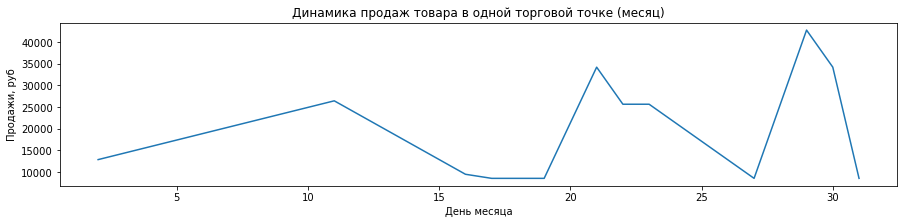

In [55]:
# График продаж товара в торговой точке (месяц)
fig = plt.figure(figsize = (15, 3))
plt.plot(data_sales_specific['day'], data_sales_specific['total_price'])
plt.xlabel("День месяца")
plt.ylabel("Продажи, руб")
plt.title("Динамика продаж товара в одной торговой точке (месяц)")
plt.show()

### Динамика продаж по всем торговым точкам

In [56]:
# Сводная таблица - сумма продаж товара по дням месяца
data_prodazhi = data_merged.pivot_table(
    index = ['gtin', 'year', 'month', 'day'],
    values = ['total_price'],
    aggfunc = 'sum'
    ).reset_index()

data_prodazhi.head()

,gtin,year,month,day,total_price
0,000353B28DA976A5CB2A71139AE83E7B,2021,12,8,74857
1,000353B28DA976A5CB2A71139AE83E7B,2021,12,9,0
2,000353B28DA976A5CB2A71139AE83E7B,2021,12,11,56142
3,000353B28DA976A5CB2A71139AE83E7B,2021,12,15,0
4,000353B28DA976A5CB2A71139AE83E7B,2021,12,17,56142


In [57]:
# Срез данных для конкретного товара - данные по продажам по дням месяца (вводные данные gtin, month, year ) 

data_prodazhi_tovar = data_prodazhi.query('(gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&(month == 3)&(year == 2022)')

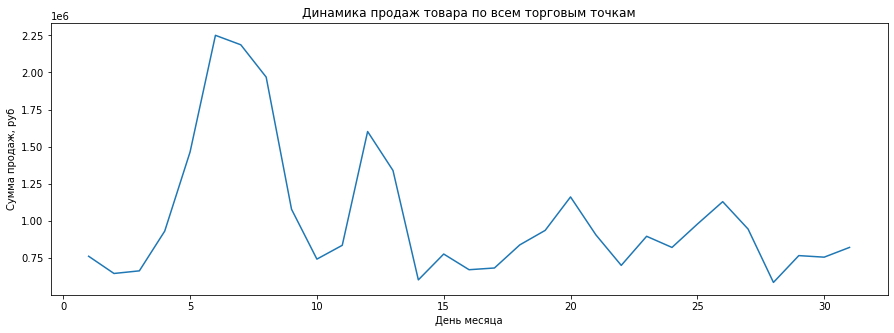

In [58]:
# График динамики продаж товара (вводные данные gtin, month, year)

fig = plt.figure(figsize = (15, 5))
plt.plot(data_prodazhi_tovar['day'], data_prodazhi_tovar['total_price'])
plt.xlabel("День месяца")
plt.ylabel("Сумма продаж, руб")
plt.title("Динамика продаж товара по всем торговым точкам")
plt.show()

### Динамика колебания цены товара

In [59]:
# Сводная таблица - цена товара по дням месяца
data_cena_tovara = data_merged.pivot_table(
    index = ['gtin', 'year', 'month', 'day'],
    values = ['price']
    ).reset_index()

data_cena_tovara.head()

,gtin,year,month,day,price
0,000353B28DA976A5CB2A71139AE83E7B,2021,12,8,74857.0
1,000353B28DA976A5CB2A71139AE83E7B,2021,12,9,0.0
2,000353B28DA976A5CB2A71139AE83E7B,2021,12,11,28071.0
3,000353B28DA976A5CB2A71139AE83E7B,2021,12,15,0.0
4,000353B28DA976A5CB2A71139AE83E7B,2021,12,17,28071.0


In [60]:
# Срез данных для конкретного товара - данные по продажам по дням месяца (вводные данные gtin, month, year ) 

data_cena_tovara_specific = data_cena_tovara.query('(gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&(month == 3)&(year == 2022)')
data_cena_tovara_specific.head()

,gtin,year,month,day,price
43275,0F40E9DE2E7DBC0DA161448D98D47C69,2022,3,1,9855.500000
43276,0F40E9DE2E7DBC0DA161448D98D47C69,2022,3,2,9693.250000
43277,0F40E9DE2E7DBC0DA161448D98D47C69,2022,3,3,10740.826087
43278,0F40E9DE2E7DBC0DA161448D98D47C69,2022,3,4,10959.086957
43279,0F40E9DE2E7DBC0DA161448D98D47C69,2022,3,5,11589.625000


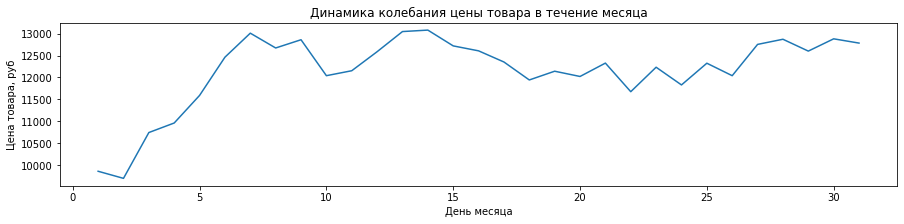

In [61]:
fig = plt.figure(figsize = (15, 3))
plt.plot(data_cena_tovara_specific['day'], data_cena_tovara_specific['price'])
plt.xlabel("День месяца")
plt.ylabel("Цена товара, руб")
plt.title("Динамика колебания цены товара в течение месяца")
plt.show()

 ### Количество магазинов, в которых продается товар

In [62]:
#Число уникальных магазинов в которых продается товар (вводные данные gtin, month, year )
# Получаем статистику по месяцам

magaziny_cnt = len(data_merged.query(
    '(gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&(month == 10)&(year == 2022)')['id_sp_'].unique())

print('Количество магазинов продававших товар в Октябре: ', magaziny_cnt)

Количество магазинов продававших товар в Октябре:  203


In [63]:
# Количество товара проданного за месяц (вводные данные gtin, month, year )
# Получаем статистику по месяцам

tovary_cnt = data_merged.query('(gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&(month == 10)&(year == 2022)')['cnt'].sum()

print('Количество единиц товара, проданных в Октябре: ', tovary_cnt)

Количество единиц товара, проданных в Октябре:  3128


In [64]:
#Среднее количество товара проданного в одном магазине
# Делим количество проданных товаров на количество уникальных магазинов

tovary_mean = tovary_cnt/magaziny_cnt

print(f'Среднее количество товара проданного в одном магазине: {tovary_mean:.0f}')

Среднее количество товара проданного в одном магазине: 15


### Динамика количества уникальных магазинов, в которых продается товар

In [65]:
# По каждому товару количество уникальных торговых точек где он был представлен
data_count_magazin = data_merged.pivot_table(
    index=['gtin','year','month', 'day'],
    values=['id_sp_'],
    aggfunc=lambda x: len(x.unique())
).reset_index()

In [66]:
data_count_magazin.columns=['gtin', 'year', 'month', 'day','id_sp_unique']

In [67]:
data_count_magazin.head()

,gtin,year,month,day,id_sp_unique
0,000353B28DA976A5CB2A71139AE83E7B,2021,12,8,1
1,000353B28DA976A5CB2A71139AE83E7B,2021,12,9,1
2,000353B28DA976A5CB2A71139AE83E7B,2021,12,11,1
3,000353B28DA976A5CB2A71139AE83E7B,2021,12,15,1
4,000353B28DA976A5CB2A71139AE83E7B,2021,12,17,2


In [68]:
# Срез данных
data_count_magazin_specific = data_count_magazin.query(
    '(gtin == "0F40E9DE2E7DBC0DA161448D98D47C69")&(month == 3)&(year == 2022)')

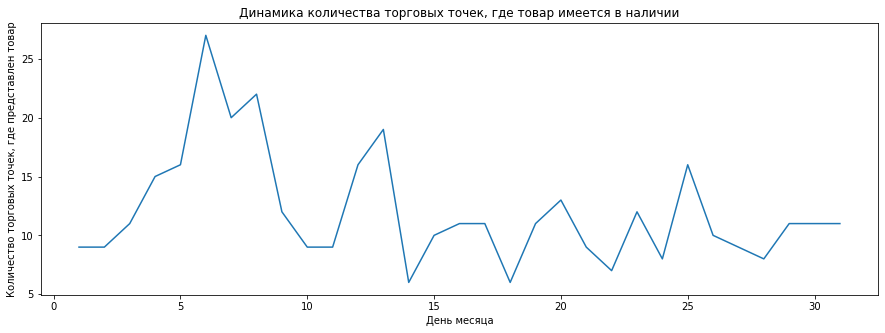

In [69]:
fig = plt.figure(figsize = (15, 5))
plt.plot(data_count_magazin_specific['day'], data_count_magazin_specific['id_sp_unique'])
plt.xlabel("День месяца")
plt.ylabel("Количество торговых точек, где представлен товар")
plt.title("Динамика количества торговых точек, где товар имеется в наличии")
plt.show()